In [1]:
%matplotlib inline
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import json
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from matplotlib import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

/home/imaya/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Seaborn plots
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
# for R lovers :)
style.use('ggplot')
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 7
# rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 20, 10

In [3]:
access_token = "1538574218-D1Wf4IDzXIM909gsVsJqDXmRdkLk3WJouDg6Wof"
access_token_secret = "pCW35DBdIKMsb3DBsyo5rsfs4Byw6YgQNNOMIWJKQ4671"
consumer_key = "ixKovylDZWX6UMt7VnQks6vyD"
consumer_secret = "d13SZQDImUIwhedjwKM3abeMTjPZPzlISFcdkOweXXrtIx2i1n"

In [4]:
MAX_TWEETS = 8000

In [5]:
# This handles Twitter authentication and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth, wait_on_rate_limit=True)

In [6]:
data = Cursor(api.search, q='HellsGateNationalPark').items(MAX_TWEETS)

In [7]:
mozsprint_data = []
data1 = {'text': [], 'user': [], 'created_at': [], 'lang': [],
        'retweet_count': [], 'favorite_count': [],
        'Location': [], 'user_followers_count': []}
# You will use this line in production instead of this
# current_working_dir = os.path.dirname(os.path.realpath(__file__))
current_working_dir = "./"
log_tweets = current_working_dir  + str(time.time()) + '_hellsgatenationalpark.txt'
with open(log_tweets, 'w') as outfile:
    for tweet in data:
        mozsprint_data.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")
        
for tweet in mozsprint_data: 
#     data1['created_at'].append(tweet['created_at'])
    data1['created_at'].append(time.strftime('%Y-%m-%d %H:%M:%S',time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))
    data1['user'].append(tweet['user']['screen_name'])
    data1['user_followers_count'].append(tweet['user']['followers_count'])
    data1['text'].append(tweet['text'])
    data1['lang'].append(tweet['lang'])
    data1['Location'].append(tweet['place']['country'] if tweet['place'] != None else None)
    data1['retweet_count'].append(tweet['retweet_count'])
    data1['favorite_count'].append(tweet['favorite_count'])
        

In [8]:
print (mozsprint_data[0])

{'possibly_sensitive': False, 'entities': {'user_mentions': [], 'hashtags': [{'text': 'longweekend', 'indices': [25, 37]}, {'text': 'gorge', 'indices': [38, 44]}, {'text': 'kenya', 'indices': [45, 51]}, {'text': 'africa', 'indices': [52, 59]}, {'text': 'hellsgatenationalpark', 'indices': [61, 83]}], 'urls': [{'indices': [84, 107], 'url': 'https://t.co/21QGVlg3gW', 'display_url': 'instagram.com/p/BN6N4y1gHOH/', 'expanded_url': 'https://www.instagram.com/p/BN6N4y1gHOH/'}], 'symbols': []}, 'id_str': '808220262365888512', 'retweet_count': 0, 'place': None, 'favorite_count': 0, 'contributors': None, 'truncated': False, 'coordinates': None, 'retweeted': False, 'in_reply_to_user_id': None, 'geo': None, 'in_reply_to_status_id_str': None, 'user': {'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/276984836/IMG_0173.JPG', 'profile_background_color': '709397', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'indices': [0, 23], 'url': 'https://t.co/PDtNpl1

In [9]:
# Create the dataframe we will use
tweets = pd.DataFrame(data1)
# # We want to know when a tweet was sent
# tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), mozsprint_data)
# # Who is the tweet owner
# tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], mozsprint_data)
# # How many follower this user has
# tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], mozsprint_data)
# # What is the tweet's content
# tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), mozsprint_data)
# # If available what is the language the tweet is written in
# tweets['lang'] = map(lambda tweet: tweet['lang'], mozsprint_data)
# # If available, where was the tweet sent from ?
# tweets['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, mozsprint_data)
# # How many times this tweet was retweeted and favorited
# tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], mozsprint_data)
# tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], mozsprint_data)

In [10]:
print (tweets.head())

  Location           created_at  favorite_count lang  retweet_count  \
0     None  2016-12-12 08:01:41               0   en              0   

                                                text         user  \
0  Rain clouds rolling in.\n\n#longweekend #gorge...  anjalinayar   

   user_followers_count  
0                  2560  


In [11]:
list_of_original_tweets = [element for element in tweets['text'].values if not element.startswith('RT')]

In [12]:
print (list_of_original_tweets[0])

Rain clouds rolling in.

#longweekend #gorge #kenya #africa 
#hellsgatenationalpark https://t.co/21QGVlg3gW


In [13]:
print ("Number of Original Tweets : " + str(len(list_of_original_tweets)))

Number of Original Tweets : 1


In [14]:
list_of_retweets = [element for element in tweets['text'].values if element.startswith('RT')]

In [15]:
print ("Number of Retweets : " + str(len(list_of_retweets)))

Number of Retweets : 0


In [20]:
f = open('../tweets.txt','a')
f.write('\n'+ '('+'3' + ',' + "'"+ "Hells Gate National Park" + "'" + ',' + "'"+ str(len(list_of_original_tweets)) + "'"+',' + "'"+ str(len(list_of_retweets)) + "'" +',' + '21'+')'+',' )
f.close() 

In [17]:
# General plotting function for the different information extracted
def plot_tweets_per_category(category, title, x_title, y_title, top_n=5, output_filename="plot.png"):
    """
    :param category: Category plotted, can be tweets users, tweets language, tweets country etc ..
    :param title: Title of the plot
    :param x_title: List of the items in x
    :param y_title: Title of the variable plotted
    :return: a plot that we can save as pdf or png instead of displaying to the screen
    """
    tweets_by_cat = category.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    tweets_by_cat[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()

/home/imaya/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


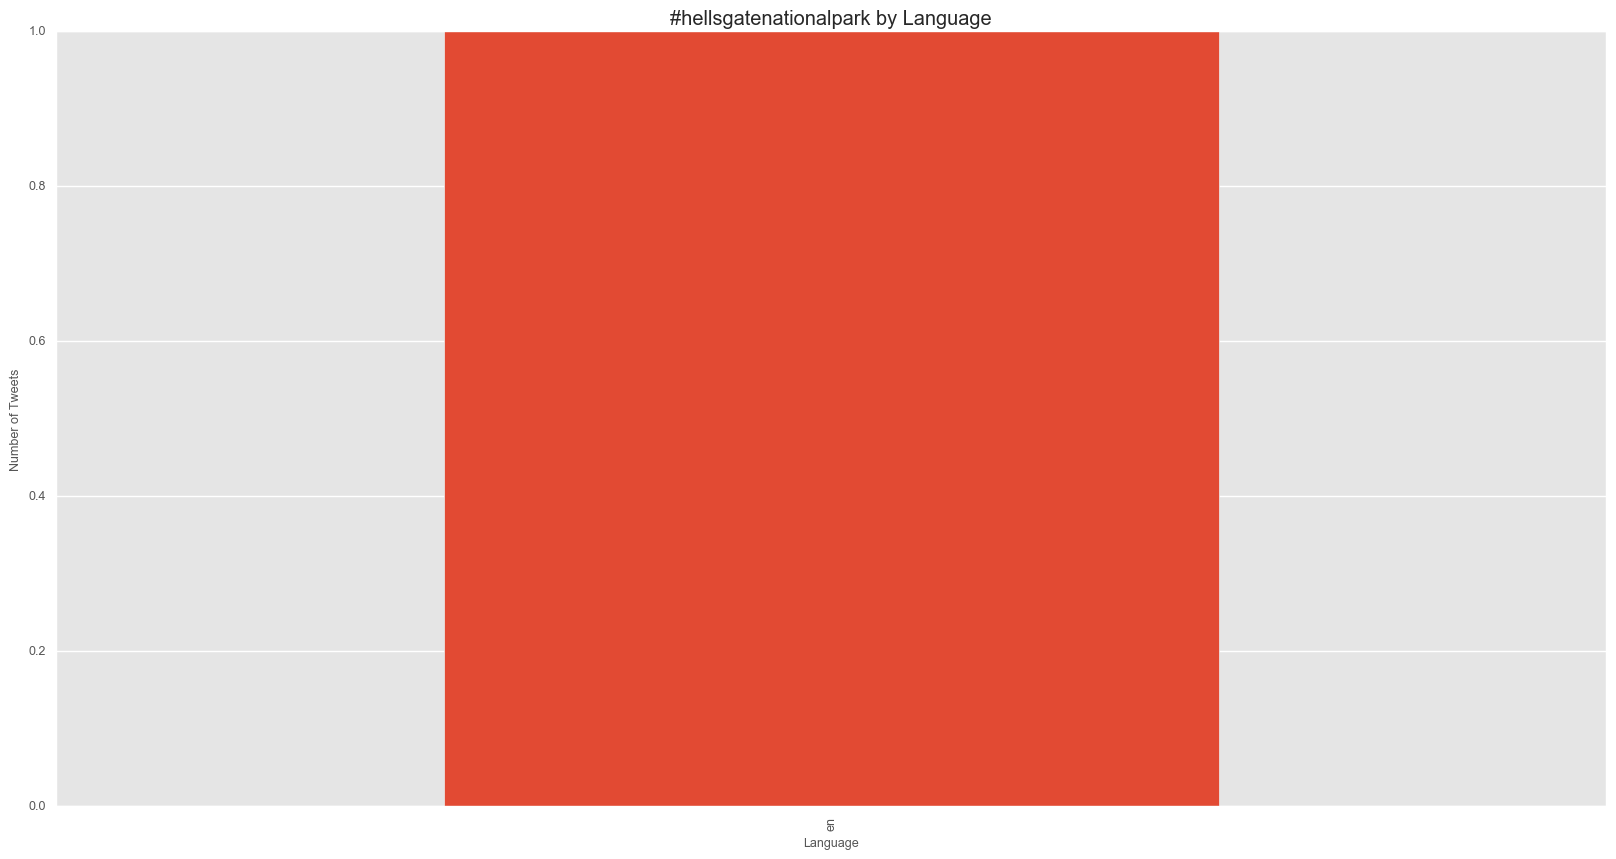

In [18]:
plot_tweets_per_category(tweets['lang'], "#hellsgatenationalpark by Language", 
                         "Language", 
                         "Number of Tweets", 
                         2000,
                         "hellsgatenationalpark_per_language.png")

TypeError: Empty 'DataFrame': no numeric data to plot

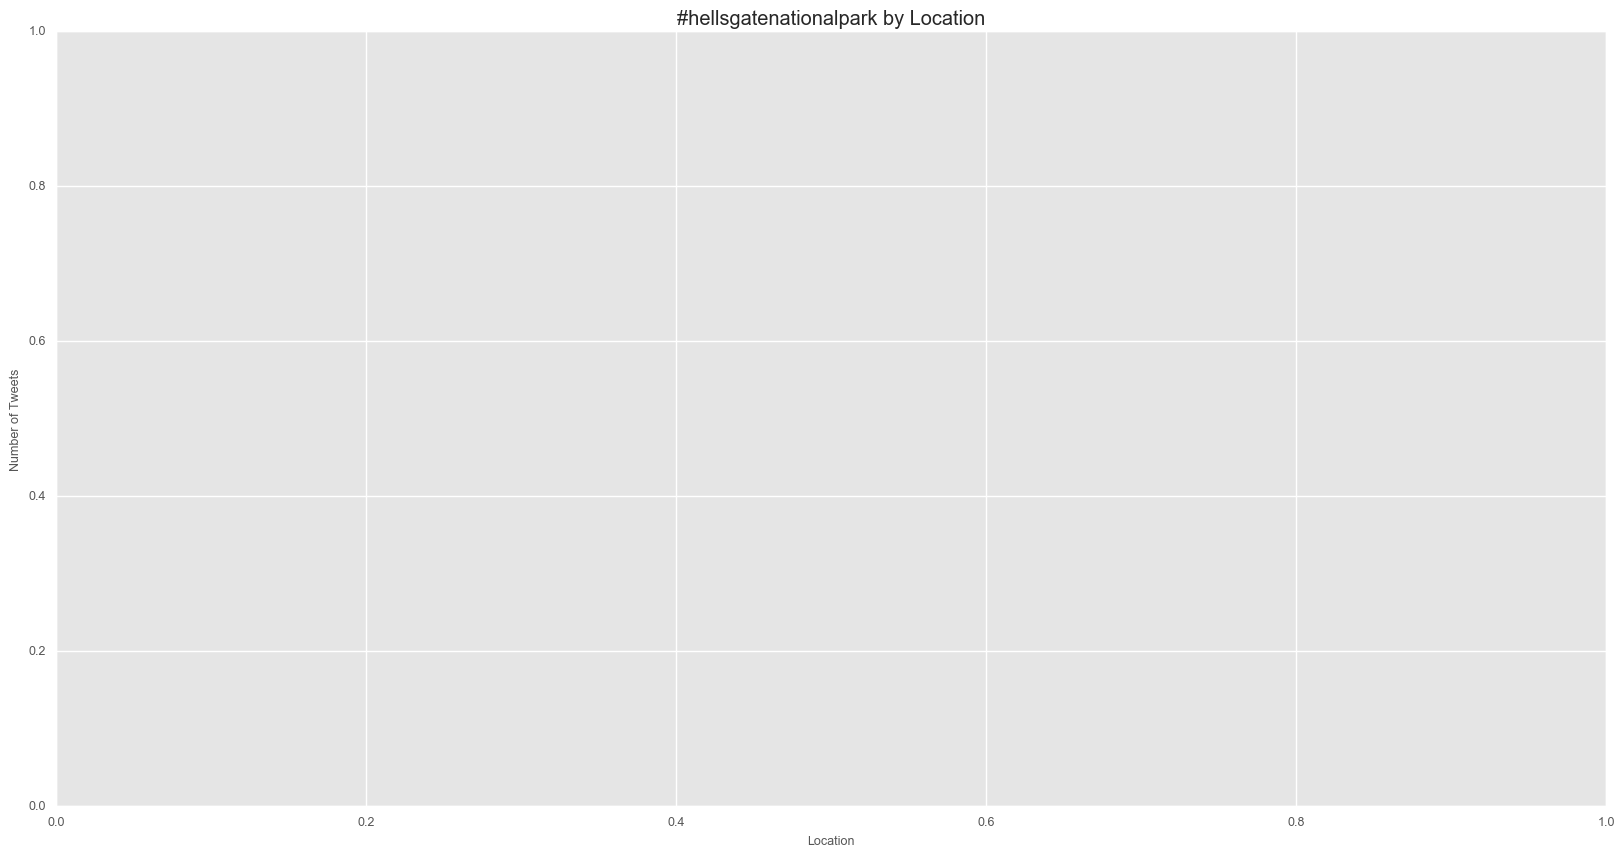

In [19]:
plot_tweets_per_category(tweets['Location'], 
                         "#hellsgatenationalpark by Location", 
                         "Location", 
                         "Number of Tweets", 2000,
                         "hellsgatenationalpark_per_location.png")

In [ ]:
plot_tweets_per_category(tweets['user'], 
                         "#hellsgatenationalpark active users", 
                         "Users", 
                         "Number of Tweets", 20,
                         "hellsgatenationalpark_users.png")

In [ ]:
def plot_distribution(category, title, x_title, y_title, output_filename="plot.png"):
    """
    :param category: Category plotted, can be users, language, country etc ..
    :param title: Title of the plot
    :param x_title: List of the items in x
    :param y_title: Title of the variable plotted
    :return: a plot that we can save as pdf or png instead of displaying to the screen
    """
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    sns.distplot(category.values, rug=True, hist=True);
    fig.savefig(output_filename)

In [ ]:
plot_distribution(tweets['retweet_count'], 
                  "#hellsgatenationalpark retweets distribution", "", "",
                  "retweets_distribution.png")

In [ ]:
df = pd.DataFrame(tweets['created_at'].value_counts(), columns=['number_tweets'])
df['date'] = df.index
df.head()

In [ ]:
days = [item.split(" ")[0] for item in df['date'].values]
df['days'] = days
grouped_tweets = df[['days', 'number_tweets']].groupby('days')
tweet_growth = grouped_tweets.sum()
tweet_growth['days']= tweet_growth.index

tweet_growth

In [ ]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
x_pos = np.arange(len(tweet_growth['days'].values))
ax.bar(x_pos, tweet_growth['number_tweets'].values, align='center')
ax.set_xticks(x_pos)
ax.set_title('#hellsgatenationalpark hashtag growth')
ax.set_ylabel("number tweets")
ax.set_xticklabels(tweet_growth['days'].values)
fig.savefig('hellsgatenationalpark_growth.png')

In [ ]:
text = " ".join(tweets['text'].values.astype(str))

In [ ]:
no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
moz_mask = imread("./twitter_mask.png", flatten=True)

In [ ]:
wc = WordCloud(background_color="white", font_path="/Library/Fonts/Verdana.ttf", stopwords=STOPWORDS, width=1800,
                      height=140, mask=moz_mask)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.savefig('hellsgatenationalpark.png', dpi=300)